<h1> PREPARE THE DATASET </h1>

<h2> Call on Necessary Libraries </h2>

In [1]:
import pandas as pd
import sklearn
import re
import contractions
from num2words import num2words 

In [57]:
path = "E:\\Python Codes\\News\\"

ds = pd.read_csv(path+"Tk_Rand.csv")
df = ds[['is_sarcastic', 'headline', 'article_link']].copy()
df.head()

,is_sarcastic,headline,article_link
0,0,'a letter to my granddaughters',https://www.huffingtonpost.com/entry/a-letter-...
1,1,"'i'll have to obstruct one last thing,' whispe...",https://politics.theonion.com/i-ll-have-to-obs...
2,1,"'i'm going to hell for laughing at this meme,'...",https://local.theonion.com/i-m-going-to-hell-f...
3,1,"'i'm not really looking to date right now,' sa...",https://local.theonion.com/i-m-not-really-look...
4,0,'i'm sorry i didn't finish the job',https://www.huffingtonpost.com/entry/bald-eagl...


<h2> Clean the Data </h2>

In [3]:
corpus = [] # A list containing all of the cleaned headlines

for i in range(0, 10000): # my dataset contains 5000 sarcastic and 5000 non-sarcastic headlines
    
    Exp = [] # to store expanded forms of contractions. For example, doesn't = does not
    exp = [] # to store the final such list
    
    headL = df["headline"][i].split() 
    for word in headL:
        Exp.append(contractions.fix(word)) # this function does the expansions 
    
    Exp = " ".join(Exp)
    Exp = re.sub("[^a-zA-Z0-9]", " ", Exp) # replaces all non-alphanumeric characters with whitespace
    Exp = Exp.split()
        
    for num in Exp:
        
        if num.isdigit():
            exp.append(num2words(num)) # Numbers get converted to digits. For example, 37 = thirty-seven
        else:
            exp.append(num)
    
    exp = " ".join(exp)
    exp = re.sub("[^a-zA-Z]", " ", exp) # removes all non-alphabetical characters; deals with the '-' in number words. 
    
    corpus.append(exp)

print(corpus[:20]) # prints first twenty headlines

['a letter to my granddaughters', 'I will have to obstruct one last thing whispers jared kushner before wrapping gloved hands around mueller s neck', 'I am going to hell for laughing at this meme says man going to hell for helping little sister get abortion', 'I am not really looking to date right now says man as if he not at mercy of love s powerful mysterious ways', 'I am sorry i did not finish the job', 'i am under eighteen button clicked for first time in history of internet', 'i do not fit into any of corporate america s little boxes says single eighteen to thirty six year old hispanic female with brand loyalty to tom s chobani', 'i feel your pain romney tells campaign rally attendees who make twenty million a year', 'i look forward to ending my life says assisted suicide advocate before being shot out of cannon at brick wall', 'i must make sure you have the skills to please my grandson says queen elizabeth disrobing before meghan markle', 'i think we still have a shot carly fiori

In [4]:
df['headline'] = corpus # Updates the Headlines to Clean Headlines

<h2> Optional: Create token lists and stemmed lists </h2>

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

tkn = [] # A list of lists containing each headline's words 
stem = [] # A list for the stemmed words

for i in range(0, 10000):
    headL = re.sub("[^a-zA-Z]", " ", df["headline"][i])
    headL = headL.split()
    t = [word for word in headL] # for the 'token' column
    
    ps = PorterStemmer()
    headL = [ps.stem(word) for word in headL if not word in set(stopwords.words("english"))] # stores stemmed words which are
                                                                                             # not stop-words
    stem.append(headL.copy())
    tkn.append(t)
    
print(tkn[:5])
print(stem[:5])

[['report', 'majority', 'of', 'ufo', 'abductions', 'committed', 'by', 'alien', 'that', 'person', 'knows'], ['pranksters', 'rename', 'mexico', 's', 'congress', 'as', 'chamber', 'of', 'rats', 'on', 'google', 'maps'], ['new', 'ronco', 'food', 'exposer', 'spoils', 'food', 'overnight'], ['kenya', 'claims', 'to', 'have', 'killed', 'over', 'one', 'hundred', 'militants', 'in', 'somalian', 'raid'], ['antonin', 'scalia', 's', 'death', 'just', 'cost', 'this', 'company', 'eight', 'hundred', 'and', 'thirty', 'five', 'million']]
[['report', 'major', 'ufo', 'abduct', 'commit', 'alien', 'person', 'know'], ['prankster', 'renam', 'mexico', 'congress', 'chamber', 'rat', 'googl', 'map'], ['new', 'ronco', 'food', 'expos', 'spoil', 'food', 'overnight'], ['kenya', 'claim', 'kill', 'one', 'hundr', 'milit', 'somalian', 'raid'], ['antonin', 'scalia', 'death', 'cost', 'compani', 'eight', 'hundr', 'thirti', 'five', 'million']]


In [9]:
# Adds in two new columns to the Dataset and saves it as a .csv file

df['token'] = tkn
df['stem'] = stem 

df.to_csv(path+"Clean.csv")

<h2> Optional: Display WordCloud generated from Data </h2>

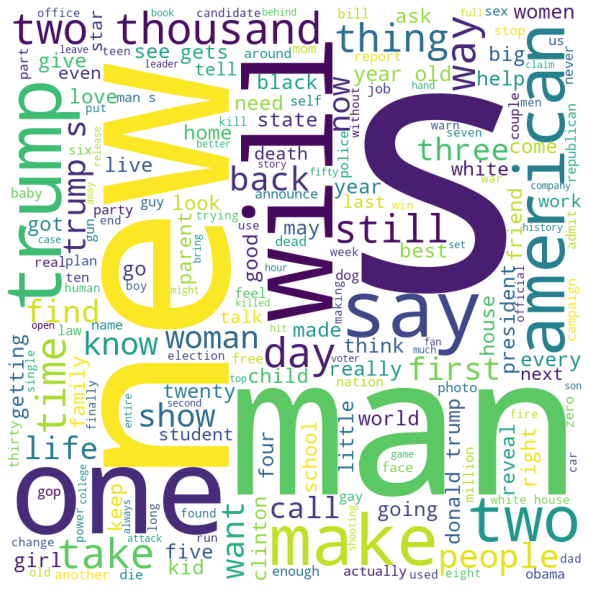

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

vocab = "" # the parameter for the WordCloud function must be a string

for i in corpus:
    for j in i:
        vocab = vocab + j

# Displays the a plot in which Word frequency is proportional to its display size
wc = WordCloud(width = 800, height = 800, background_color ='white',
                min_font_size = 3).generate(vocab)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show() # the singular s corresponds to 's for which the apostrophe got removed

<h2> Initialize Feature Extractors </h2>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [58]:
# Feature Extraction using Count Vectorizer

cv = CountVectorizer() 
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0) # 90:10 split

In [59]:
# Feature Extraction using TF-IDF Vectorizer

tfdf = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
xtf = tfdf.fit_transform(corpus).toarray()

xtf_train, xtf_test, ytf_train, ytf_test = train_test_split(xtf, y, test_size = 0.10, random_state = 0)

In [60]:
# Feature Extraction using Hashing Vectorizer

xhsh = HashingVectorizer(n_features=2**4).fit_transform(corpus).toarray()

xhs_train, xhs_test, yhs_train, yhs_test = train_test_split(xhsh, y, test_size = 0.10, random_state = 0)

In [61]:
from sklearn.metrics import confusion_matrix
# Define function to compute Evaluation metrics

def Eval(tru, pre, fea, mod): # True Value, Predicted Value, Feature Extractor, Classification Model
    cm = confusion_matrix(tru, pre)
    print(str(cm))
    
    TN = cm[0][0] # true negatives
    TP = cm[1][1] # true positives

    FN = cm[0][1] # false negatives
    FP = cm[1][0] # false positives

    Acc = (TP + TN) / (TP + TN + FP + FN) # Accuracy
    Prec = TP / (TP + FP) # Precision
    Rec = TP / (TP + FN) # Recall
    F1 = (2 * Rec * Prec) / (Rec + Prec) # F1 Score
    
    print("\nResults of " + mod + " Classifier, using " + fea + " Vectorizer :\n")
    print("Accuracy = " + str(Acc * 100)[:5] +"%")
    print("Precision = " + str(Prec * 100)[:5] +"%")
    print("Recall = " + str(Rec * 100)[:5] +"%")
    print("F1 Score = " + str(F1 * 100)[:5] +"%")
    
    #print(TN + " " + TP + " " + FN + " " + FP)
    print("-------------------------------------------------------")

<h2> Optional : Pre-trained GloVe Model for Feature Extraction </h2>

<h4> NOTE: In this project, the GloVe modules use a separate unbalanced dataset containing 55k entries- the full Sarcastic News Headlines dataset from Kaggle. The rest use a balanced dataset with 10k entries. </h4>

In [43]:
path = "E:\\Python Codes\\New\\"
ds = pd.read_csv(path+"TheBFG.csv")
df = ds[["headline", "is_sarcastic"]].copy()
df.head()

x = df["headline"]
y = df["is_sarcastic"]

xg_train, xg_test , yg_train, yg_test = train_test_split(x, y , test_size = 0.10)

vocab_size = 15726
oov_token = "<OOV>"
max_length = 100
padding_type = "post"
trunction_type='post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(xg_train)
word_index = tokenizer.word_index

<h3> Tokenize into Sequences and add Padding </h3>

In [44]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

xg_train = pad_sequences(tokenizer.texts_to_sequences(xg_train), maxlen=max_length, padding=padding_type, 
                                  truncating=trunction_type)

xg_test = pad_sequences(tokenizer.texts_to_sequences(xg_test), maxlen=max_length, padding=padding_type, 
                                  truncating=trunction_type)

<h3> Load the model </h3>

In [45]:
import numpy as np

def load_glove(glove_file):
    """
    :param glove_file: embeddings_path: path of glove file.
    :return: glove model
    """

    f = open(glove_file + ".txt", 'r', encoding='utf-8')
    model = {}
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        model[word] = coefs
    return model

In [46]:
model = load_glove("glove.6B.100d") # load model as downloaded prior
model["new"]

array([-4.3959e-02,  1.8936e-01,  6.6110e-01, -4.9007e-01,  3.2211e-01,
       -3.4161e-01, -6.8480e-02,  3.1364e-01, -7.1142e-01,  5.7436e-01,
       -3.3588e-01, -5.2279e-01, -3.9075e-01, -8.9694e-02,  4.6371e-01,
       -3.5610e-01,  8.4576e-01, -2.6188e-02, -1.9328e-01, -8.3846e-02,
        3.1806e-01, -1.9812e-01,  3.0009e-01,  6.9189e-02,  5.4470e-01,
       -5.9193e-01,  5.4221e-01, -6.2876e-01, -5.3447e-01,  4.2334e-01,
        3.0869e-02,  9.7164e-01, -5.6222e-01,  4.5752e-02, -5.7100e-01,
        8.0185e-02, -8.1434e-02, -6.0260e-01,  1.6466e-01, -4.0281e-01,
       -4.7701e-01, -5.1950e-01,  1.2777e-01, -4.3775e-01,  2.6602e-01,
        4.8752e-01, -6.0220e-02, -5.2622e-01,  3.7687e-01, -1.8007e-01,
        3.0166e-02, -9.4577e-02,  1.6330e-01,  5.9041e-01, -4.8877e-01,
       -3.4230e+00,  1.3113e-01, -8.0386e-02,  1.8978e+00,  1.8857e-01,
       -5.7300e-01,  8.6358e-01,  2.1116e-03,  3.6060e-01,  8.0475e-01,
       -1.3954e-01, -5.3935e-02,  3.8873e-01,  3.0673e-01, -3.13

<h3> Initialize Embedding Matrix for fusion with Neural Networks </h3>

In [47]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = model.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

<h1> MACHINE LEARNING MODELS </h1>

<h2> Gaussian Naive Bayes Model </h2>

In [64]:
from sklearn.naive_bayes import GaussianNB

mod = "Gaussian Naive Bayes"
clssF = GaussianNB() # Define model

# Fit data onto model and evaluate it for each feature extractor 

clssF.fit(x_train, y_train) # Fit data onto model
Eval(y_test, clssF.predict(x_test), "Count" , mod) # Evaluate model

clssF.fit(xtf_train, ytf_train)
Eval(ytf_test, clssF.predict(xtf_test), "TF-IDF", mod)

clssF.fit(xhs_train, yhs_train)
Eval(yhs_test, clssF.predict(xhs_test), "Hashing", mod)

[[414  77]
 [235 274]]

Results of Gaussian Naive Bayes Classifier, using Count Vectorizer :

Accuracy = 68.8%
Precision = 53.83%
Recall = 78.06%
F1 Score = 63.72%
-------------------------------------------------------
[[400  91]
 [229 280]]

Results of Gaussian Naive Bayes Classifier, using TF-IDF Vectorizer :

Accuracy = 68.0%
Precision = 55.00%
Recall = 75.47%
F1 Score = 63.63%
-------------------------------------------------------
[[284 207]
 [195 314]]

Results of Gaussian Naive Bayes Classifier, using Hashing Vectorizer :

Accuracy = 59.8%
Precision = 61.68%
Recall = 60.26%
F1 Score = 60.97%
-------------------------------------------------------


<h2> Decision Tree Model </h2>

In [63]:
from sklearn.tree import DecisionTreeClassifier

mod = "Decision Tree"
clssF = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

clssF.fit(x_train, y_train)
Eval(y_test, clssF.predict(x_test), "Count", mod)

clssF.fit(xtf_train, ytf_train)
Eval(ytf_test, clssF.predict(xtf_test), "TF-IDF", mod)

clssF.fit(xhs_train, yhs_train)
Eval(yhs_test, clssF.predict(xhs_test), "Hashing", mod)

[[336 155]
 [111 398]]

Results of Decision Tree Classifier, using Count Vectorizer :

Accuracy = 73.4%
Precision = 78.19%
Recall = 71.97%
F1 Score = 74.95%
-------------------------------------------------------
[[336 155]
 [111 398]]

Results of Decision Tree Classifier, using TF-IDF Vectorizer :

Accuracy = 73.4%
Precision = 78.19%
Recall = 71.97%
F1 Score = 74.95%
-------------------------------------------------------
[[267 224]
 [237 272]]

Results of Decision Tree Classifier, using Hashing Vectorizer :

Accuracy = 53.90%
Precision = 53.43%
Recall = 54.83%
F1 Score = 54.12%
-------------------------------------------------------


<h2> Logistic Regression Model </h2>

In [62]:
from sklearn.linear_model import LogisticRegression

mod = "Logistic Regression"
clssF = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=0.4, penalty='l2',max_iter=1000)


clssF.fit(x_train, y_train)
Eval(y_test, clssF.predict(x_test), "Count", mod)

clssF.fit(xtf_train, ytf_train)
Eval(ytf_test, clssF.predict(xtf_test), "TF-IDF", mod)

clssF.fit(xhs_train, yhs_train)
Eval(yhs_test, clssF.predict(xhs_test), "Hashing", mod)

[LibLinear][[396  95]
 [ 76 433]]

Results of Logistic Regression Classifier, using Count Vectorizer :

Accuracy = 82.89%
Precision = 85.06%
Recall = 82.00%
F1 Score = 83.51%
-------------------------------------------------------
[LibLinear][[390 101]
 [ 93 416]]

Results of Logistic Regression Classifier, using TF-IDF Vectorizer :

Accuracy = 80.60%
Precision = 81.72%
Recall = 80.46%
F1 Score = 81.09%
-------------------------------------------------------
[LibLinear][[283 208]
 [226 283]]

Results of Logistic Regression Classifier, using Hashing Vectorizer :

Accuracy = 56.59%
Precision = 55.59%
Recall = 57.63%
F1 Score = 56.60%
-------------------------------------------------------


<h2> Support Vector Machine Model </h2>

In [65]:
from sklearn import svm

mod = "Support Vector Machine"
clssF = svm.SVC(C=10000, kernel='linear', degree=3, gamma='scale')


clssF.fit(x_train, y_train)
Eval(y_test, clssF.predict(x_test), "Count", mod)

clssF.fit(xtf_train, ytf_train)
Eval(ytf_test, clssF.predict(xtf_test), "TF-IDF", mod)

clssF.fit(xhs_train, yhs_train)
Eval(yhs_test, clssF.predict(xhs_test), "Hashing", mod)

[[383 108]
 [107 402]]

Results of Support Vector Machine Classifier, using Count Vectorizer :

Accuracy = 78.5%
Precision = 78.97%
Recall = 78.82%
F1 Score = 78.90%
-------------------------------------------------------
[[387 104]
 [114 395]]

Results of Support Vector Machine Classifier, using TF-IDF Vectorizer :

Accuracy = 78.2%
Precision = 77.60%
Recall = 79.15%
F1 Score = 78.37%
-------------------------------------------------------
[[268 223]
 [222 287]]

Results of Support Vector Machine Classifier, using Hashing Vectorizer :

Accuracy = 55.50%
Precision = 56.38%
Recall = 56.27%
F1 Score = 56.32%
-------------------------------------------------------


<h2> K-Nearest Neighbors Model </h2>

In [66]:
from sklearn.neighbors import KNeighborsClassifier

mod = "K-Nearest Neighbors"
clssF = KNeighborsClassifier(n_neighbors=47) # since sqrt(5000)//2 = 36 = 37 (since odd number is taken)


clssF.fit(x_train, y_train)
Eval(y_test, clssF.predict(x_test), "Count", mod)

clssF.fit(xtf_train, ytf_train)
Eval(ytf_test, clssF.predict(xtf_test), "TF-IDF", mod)

clssF.fit(xhs_train, yhs_train)
Eval(yhs_test, clssF.predict(xhs_test), "Hashing", mod)

[[400  91]
 [289 220]]

Results of K-Nearest Neighbors Classifier, using Count Vectorizer :

Accuracy = 62.0%
Precision = 43.22%
Recall = 70.73%
F1 Score = 53.65%
-------------------------------------------------------
[[491   0]
 [506   3]]

Results of K-Nearest Neighbors Classifier, using TF-IDF Vectorizer :

Accuracy = 49.4%
Precision = 0.589%
Recall = 100.0%
F1 Score = 1.171%
-------------------------------------------------------
[[284 207]
 [224 285]]

Results of K-Nearest Neighbors Classifier, using Hashing Vectorizer :

Accuracy = 56.89%
Precision = 55.99%
Recall = 57.92%
F1 Score = 56.94%
-------------------------------------------------------


<h2> Random Forest Model </h2>

In [67]:
from sklearn.ensemble import RandomForestClassifier

mod = "Random Forest"
clssF = RandomForestClassifier(n_estimators=100, random_state=0, max_features = 'sqrt', n_jobs=-1, verbose = 1)


clssF.fit(x_train, y_train)
Eval(y_test, clssF.predict(x_test), "Count", mod)

clssF.fit(xtf_train, ytf_train)
Eval(ytf_test, clssF.predict(xtf_test), "TF-IDF", mod)

clssF.fit(xhs_train, yhs_train)
Eval(yhs_test, clssF.predict(xhs_test), "Hashing", mod)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[[360 131]
 [ 84 425]]

Results of Random Forest Classifier, using Count Vectorizer :

Accuracy = 78.5%
Precision = 83.49%
Recall = 76.43%
F1 Score = 79.81%
-------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


[[360 131]
 [ 84 425]]

Results of Random Forest Classifier, using TF-IDF Vectorizer :

Accuracy = 78.5%
Precision = 83.49%
Recall = 76.43%
F1 Score = 79.81%
-------------------------------------------------------
[[297 194]
 [202 307]]

Results of Random Forest Classifier, using Hashing Vectorizer :

Accuracy = 60.4%
Precision = 60.31%
Recall = 61.27%
F1 Score = 60.79%
-------------------------------------------------------


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


<h1> NEURAL NETWORK MODELS </h1>

<h2> Convoluted Neural Network</h2>

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [14]:
mx_w = 32 # maximum headline length, in words
cnn = Sequential()

cnn.add(Embedding(15726 , 8, input_length=mx_w)) # input dimensions = 32, output dimensions = 4
cnn.add(Conv1D(8, 3, padding='same', activation='relu'))
cnn.add(MaxPooling1D())
cnn.add(Flatten())
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(12, activation='relu'))
cnn.add(Dense(8, activation='relu'))
cnn.add(Dense(4, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 8)             125808    
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 8)             200       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

<h3> Using Count Vectorized Data </h3>

In [15]:
# Pad Model Input
x_train = sequence.pad_sequences(x_train, maxlen=mx_w)
x_test = sequence.pad_sequences(x_test, maxlen=mx_w)

# Test Model Accuracy
cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128, verbose=2)
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
71/71 - 1s - loss: 0.6932 - accuracy: 0.4928 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 2/2
71/71 - 0s - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.4910
Accuracy: 49.10%


<h3> Using TF-IDF Vectorized Data</h3>

In [16]:
# Pad Model Input
xtf_train = sequence.pad_sequences(xtf_train, maxlen=mx_w)
xtf_test = sequence.pad_sequences(xtf_test, maxlen=mx_w)

# Test Model Accuracy
cnn.fit(xtf_train, ytf_train, validation_data=(xtf_test, ytf_test), epochs=2, batch_size=128, verbose=2)
scores = cnn.evaluate(xtf_test, ytf_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
71/71 - 0s - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 2/2
71/71 - 0s - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.4910
Accuracy: 49.10%


<h3> Using Pre-trained GloVe (on the 55k dataset) </h3>

In [48]:
embedding_layer = Embedding(len(word_index) + 1, max_length, weights=[embedding_matrix],
                                input_length=max_length, trainable=False)

embedding_dim = 16
input_length = 100

In [49]:
cnn = Sequential()
cnn.add(embedding_layer) # input dimensions = 32, output dimensions = 4
cnn.add(Conv1D(8, 3, padding='same', activation='relu'))
cnn.add(MaxPooling1D())
cnn.add(Flatten())
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(12, activation='relu'))
cnn.add(Dense(8, activation='relu'))
cnn.add(Dense(4, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          2568200   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 8)            2408      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 8)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                6416      
_________________________________________________________________
dense_17 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                

In [68]:
from keras.callbacks import EarlyStopping
num_epochs = 7
# callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

history = cnn.fit(xg_train, yg_train, epochs=num_epochs, validation_data=(xg_test, yg_test))

Epoch 1/7
1557/1557 [==============================] - 8s 5ms/step - loss: 0.2837 - accuracy: 0.8804 - val_loss: 0.3250 - val_accuracy: 0.8576
Epoch 2/7
1557/1557 [==============================] - 7s 4ms/step - loss: 0.2755 - accuracy: 0.8847 - val_loss: 0.3275 - val_accuracy: 0.8626
Epoch 3/7
1557/1557 [==============================] - 7s 4ms/step - loss: 0.2710 - accuracy: 0.8883 - val_loss: 0.3113 - val_accuracy: 0.8664
Epoch 4/7
1557/1557 [==============================] - 7s 4ms/step - loss: 0.2654 - accuracy: 0.8913 - val_loss: 0.3075 - val_accuracy: 0.8663
Epoch 5/7
1557/1557 [==============================] - 7s 4ms/step - loss: 0.2599 - accuracy: 0.8936 - val_loss: 0.3068 - val_accuracy: 0.8701
Epoch 6/7
1557/1557 [==============================] - 7s 4ms/step - loss: 0.2553 - accuracy: 0.8946 - val_loss: 0.3054 - val_accuracy: 0.8733
Epoch 7/7
1557/1557 [==============================] - 7s 5ms/step - loss: 0.2521 - accuracy: 0.8962 - val_loss: 0.3211 - val_accuracy: 0.8617

In [51]:
scores = cnn.evaluate(xg_test, yg_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.01%


<h2> Bidirectional Long Short-term Memory Model </h2>

In [9]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Bidirectional

In [11]:
mx_w = 32 # maximum headline length, in words
embedding_layer = Embedding(8, mx_w,input_length=mx_w, trainable=False)

embedding_dim = 16
input_length = 100

bilstm = Sequential([
    embedding_layer,
  Bidirectional(LSTM(embedding_dim, return_sequences=True)),
  Bidirectional(LSTM(embedding_dim,)),
  Dense(6, activation='relu'),
  Dense(1, activation='sigmoid')
])

bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bilstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 32)            256       
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 32)            6272      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 13,005
Trainable params: 12,749
Non-trainable params: 256
_________________________________________________________________


<h3> Using Count Vectorizer </h3>

In [13]:
# Pad Model Input
x_train = sequence.pad_sequences(x_train, maxlen=mx_w)
x_test = sequence.pad_sequences(x_test, maxlen=mx_w)

# Test Model Accuracy
bilstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128, verbose=2)
scores = bilstm.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
71/71 - 3s - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 2/2
71/71 - 1s - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5090
Accuracy: 50.90%


<h3> Using TF-IDF Vectorizer </h3>

In [ ]:
# Pad Model Input
xtf_train = sequence.pad_sequences(xtf_train, maxlen=mx_w)
xtf_test = sequence.pad_sequences(xtf_test, maxlen=mx_w)

# Test Model Accuracy
bilstm.fit(xtf_train, ytf_train, validation_data=(xtf_test, ytf_test), epochs=2, batch_size=128, verbose=2)
scores = bilstm.evaluate(xtf_test, ytf_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<h3> Using Pre-trained GloVe (on the 55k Dataset) </h3> 

In [52]:
embedding_layer = Embedding(len(word_index) + 1, max_length, weights=[embedding_matrix],
                                input_length=max_length, trainable=False)

embedding_dim = 16
input_length = 100

In [53]:
bilstm = Sequential([
    embedding_layer,
  Bidirectional(LSTM(embedding_dim, return_sequences=True)),
  Bidirectional(LSTM(embedding_dim,)),
  Dense(6, activation='relu'),
  Dense(1, activation='sigmoid')
])
bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bilstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          2568200   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100, 32)           14976     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 7         
Total params: 2,589,653
Trainable params: 21,453
Non-trainable params: 2,568,200
_________________________________________________________________


In [69]:
from keras.callbacks import EarlyStopping
num_epochs = 7
# callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

history = bilstm.fit(xg_train, yg_train, epochs=num_epochs, validation_data=(xg_test, yg_test))

Epoch 1/7
1557/1557 [==============================] - 57s 36ms/step - loss: 0.1365 - accuracy: 0.9491 - val_loss: 0.1977 - val_accuracy: 0.9277
Epoch 2/7
1557/1557 [==============================] - 59s 38ms/step - loss: 0.1192 - accuracy: 0.9565 - val_loss: 0.1941 - val_accuracy: 0.9324
Epoch 3/7
1557/1557 [==============================] - 59s 38ms/step - loss: 0.1070 - accuracy: 0.9626 - val_loss: 0.2012 - val_accuracy: 0.9257
Epoch 4/7
1557/1557 [==============================] - 59s 38ms/step - loss: 0.0931 - accuracy: 0.9673 - val_loss: 0.1795 - val_accuracy: 0.9375
Epoch 5/7
1557/1557 [==============================] - 60s 38ms/step - loss: 0.0836 - accuracy: 0.9716 - val_loss: 0.1515 - val_accuracy: 0.9521
Epoch 6/7
1557/1557 [==============================] - 59s 38ms/step - loss: 0.0722 - accuracy: 0.9760 - val_loss: 0.1534 - val_accuracy: 0.9526
Epoch 7/7
1557/1557 [==============================] - 59s 38ms/step - loss: 0.0643 - accuracy: 0.9795 - val_loss: 0.1487 - val_ac

In [55]:
scores = bilstm.evaluate(xg_test, yg_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 91.94%


<h3> For the 55k dataset, 91.94% is the highest accuracy achieved through Bidirectional LSTM using GloVe, whereas for the 10k dataset, 82.89% is the highest accuracy achieved through Logistic Regression Classifier using Count Vecotrizer. The train-test split by 90:10, which provides highest accuracy for the dataset.</h3>